In [25]:
from keras import layers
from keras import models
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
from itertools import cycle
from tensorflow.python.client import device_lib
import itertools
from keras import backend as K
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 788377876071971163
]


[]

In [3]:
def getTargetNames(validation_generator):
    dictionary = validation_generator.class_indices
    result = []
    result_indexes = []
    for x in dictionary:
        #print(x)
        result.append(x)
        result_indexes.append(dictionary[x])
    return result, result_indexes

In [18]:
train_dir = "C:/Users/Ilker/Documents/Informatik/master_11Sem/Masterarbeit/Tomaten/dataset/train"
validation_dir = "C:/Users/Ilker/Documents/Informatik/master_11Sem/Masterarbeit/Tomaten/dataset/validation"
test_dir = "C:/Users/Ilker/Documents/Informatik/master_11Sem/Masterarbeit/Tomaten/dataset/test"

# Rescales all images by 1/255
#rain_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
#validation_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

print(validation_generator.class_indices)
target_names, target_index = getTargetNames(validation_generator)


Found 14523 images belonging to 10 classes.
Found 2719 images belonging to 10 classes.
Found 903 images belonging to 10 classes.
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


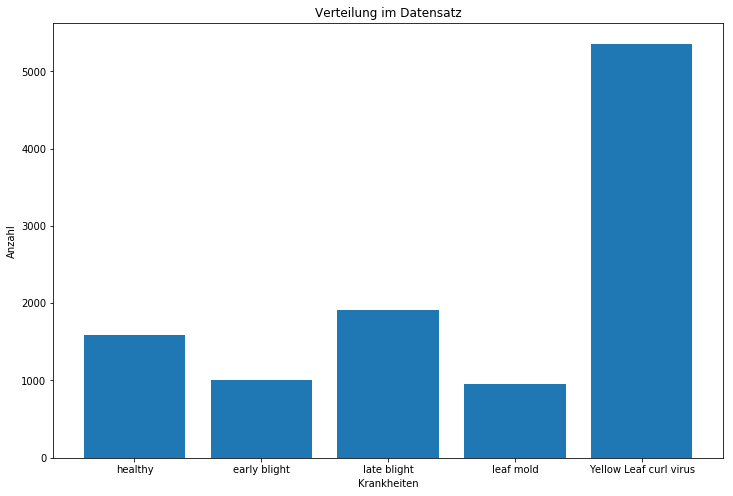

In [22]:
plt.figure(figsize=(12,8))
x = ['healthy','early blight','late blight','leaf mold','Yellow Leaf curl virus', ]
y_testd = [1592, 1000, 1910, 952 , 5357]
#y_
plt.title("Verteilung im Datensatz")
plt.xlabel("Krankheiten")
plt.ylabel("Anzahl")
p1 = plt.bar(x,y_testd)


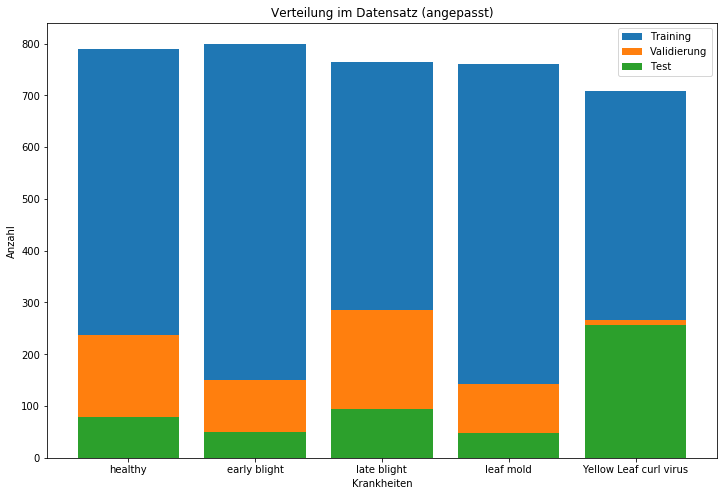

In [21]:
## angepasst

plt.figure(figsize=(12,8))
x = ['healthy','early blight','late blight','leaf mold','Yellow Leaf curl virus']
y_train = [789, 800, 764, 761, 708]
y_validation = [238, 150, 286, 142, 267]
y_testd = [79, 50, 95, 47, 256]
plt.title("Verteilung im Datensatz (angepasst)")
plt.xlabel("Krankheiten")
plt.ylabel("Anzahl")
p1 = plt.bar(x,y_train)
p2 = plt.bar(x,y_validation)
p3 = plt.bar(x,y_testd)

plt.legend((p1[0], p2[0], p3[0]), ('Training', 'Validierung', 'Test'))

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
#model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [19]:
#######Experiermentier
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
#model.add(layers.Dense(256, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(5, activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])

#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
__________

In [10]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('C:/Users/Ilker/Desktop/best_model_7.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=230,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=43,
    callbacks = [es, mc])

Epoch 1/200
230/230 [==============================] - 91s 396ms/step - loss: 1.5563 - acc: 0.5156 - val_loss: 1.9264 - val_acc: 0.5044

Epoch 00001: val_loss improved from inf to 1.92638, saving model to C:/Users/Ilker/Desktop/best_model_7.h5
Epoch 2/200
230/230 [==============================] - 56s 244ms/step - loss: 1.0044 - acc: 0.6983 - val_loss: 1.3836 - val_acc: 0.6324

Epoch 00002: val_loss improved from 1.92638 to 1.38362, saving model to C:/Users/Ilker/Desktop/best_model_7.h5
Epoch 3/200
230/230 [==============================] - 57s 248ms/step - loss: 0.7967 - acc: 0.7635 - val_loss: 1.4516 - val_acc: 0.5941

Epoch 00003: val_loss did not improve from 1.38362
Epoch 4/200
230/230 [==============================] - 58s 253ms/step - loss: 0.6977 - acc: 0.7932 - val_loss: 0.6598 - val_acc: 0.8222

Epoch 00004: val_loss improved from 1.38362 to 0.65983, saving model to C:/Users/Ilker/Desktop/best_model_7.h5
Epoch 5/200
230/230 [==============================] - 57s 246ms/step - 

230/230 [==============================] - 57s 249ms/step - loss: 0.1293 - acc: 0.9693 - val_loss: 0.1115 - val_acc: 0.9735

Epoch 00040: val_loss did not improve from 0.10729
Epoch 41/200
230/230 [==============================] - 56s 244ms/step - loss: 0.1364 - acc: 0.9684 - val_loss: 0.2154 - val_acc: 0.9449

Epoch 00041: val_loss did not improve from 0.10729
Epoch 42/200
230/230 [==============================] - 58s 253ms/step - loss: 0.1303 - acc: 0.9701 - val_loss: 0.1090 - val_acc: 0.9807

Epoch 00042: val_loss did not improve from 0.10729
Epoch 43/200
230/230 [==============================] - 58s 251ms/step - loss: 0.1341 - acc: 0.9677 - val_loss: 0.1738 - val_acc: 0.9610

Epoch 00043: val_loss did not improve from 0.10729
Epoch 44/200
230/230 [==============================] - 58s 253ms/step - loss: 0.1302 - acc: 0.9698 - val_loss: 0.3789 - val_acc: 0.9096

Epoch 00044: val_loss did not improve from 0.10729
Epoch 45/200
230/230 [==============================] - 56s 245ms/st

In [8]:
model.save("C:/Users/Ilker/Desktop/dataset/model.h5")

In [16]:
from keras.models import load_model
model = load_model("C:/Users/Ilker/Documents/Informatik/master_11Sem/Masterarbeit/masterthesis/plot_backup/best_model_7.h5")

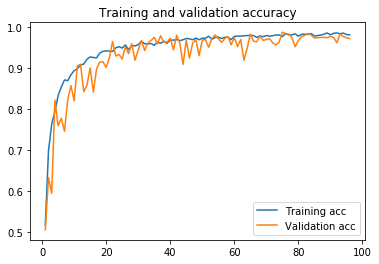

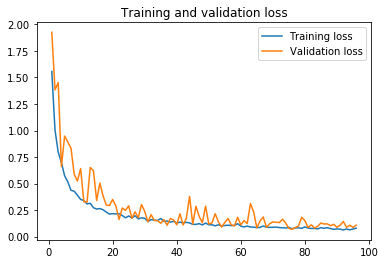

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [95]:
#y_img_batch, y_class_batch = validation_generator[0] 
#y_pred = np.argmax(model.predict(y_img_batch),-1)
#y_true = np.argmax(y_class_batch,-1)
#print(sum(y_pred==y_true)/32)
#print(y_class_batch)

#validation_generator.reset()
#scores = model.evaluate_generator(validation_generator,32, workers=12)
#print(scores)

validation_generator.reset()
num_of_test_samples = 1072 #1619
print(validation_generator.n)
print(validation_generator.batch_size)

score = model.evaluate_generator(validation_generator, num_of_test_samples/32, pickle_safe=False)
print("score evaluate" + str(score))
print(model.metrics_names)
steps=np.ceil(num_of_test_samples/32)+1
scores = model.predict_generator(validation_generator, steps = steps)
print(scores.shape)
print("score predict" + str(scores))

Y_pred = model.predict_generator(validation_generator, validation_generator.n//validation_generator.batch_size, verbose = 1)
classes = validation_generator.classes[validation_generator.index_array]
y_pred = np.argmax(Y_pred, axis=-1)
#print(sum(y_pred==classes)/10000)



from sklearn.metrics import confusion_matrix
#confusion_matrix(validation_generator.classes[validation_generator.index_array],y_pred)

1072
32


C:\Users\Ilker\Anaconda3\envs\masterarbeit\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `evaluate_generator` call to the Keras 2 API: `evaluate_generator(<keras_pre..., 33.5, use_multiprocessing=False)`
  app.launch_new_instance()


score evaluate[0.06634867697286961, 0.9860074626865671]
['loss', 'acc']
(1104, 5)
score predict[[9.9199706e-01 1.4648341e-04 2.6158394e-05 7.8269830e-03 3.3485676e-06]
 [9.8376578e-01 1.6234007e-02 3.8841350e-08 2.0296280e-08 9.1726804e-08]
 [9.9784076e-01 1.9907088e-03 1.6125871e-04 4.0192695e-06 3.3262052e-06]
 ...
 [9.9578273e-01 4.2129103e-03 1.0924699e-06 2.7519227e-06 6.0866029e-07]
 [9.8925275e-01 1.0066453e-02 6.0430379e-04 6.5466971e-05 1.1049068e-05]
 [9.9946135e-01 5.1568670e-04 2.1869988e-05 7.7238781e-07 3.7883783e-07]]
33/33 [==============================] - 2s 64ms/step


[[145   5   0   0   0]
 [  6 278   0   1   1]
 [  2   0 140   0   0]
 [  0   0   0 256   0]
 [  0   0   0   0 238]]
Classification Report
                        precision    recall  f1-score   support

          Early_blight       0.95      0.97      0.96       150
           Late_blight       0.98      0.97      0.98       286
             Leaf_Mold       1.00      0.99      0.99       142
Yellow_Leaf_Curl_Virus       1.00      1.00      1.00       256
               healthy       1.00      1.00      1.00       238

             micro avg       0.99      0.99      0.99      1072
             macro avg       0.98      0.98      0.98      1072
          weighted avg       0.99      0.99      0.99      1072



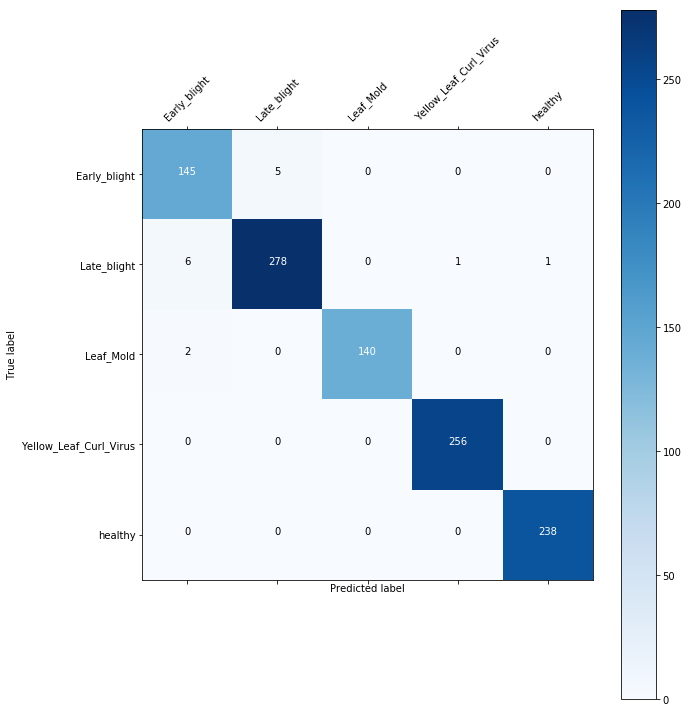

In [102]:
#num_of_test_samples = 2719 
#Y_pred = model.predict_generator(validation_generator, num_of_test_samples // 32+1)
#y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))

validation_generator.reset()
names, index = getTargetNames(validation_generator)
num_of_test_samples = 1072 #1619
steps=np.ceil(num_of_test_samples//32)+1
Y_pred = model.predict_generator(validation_generator,steps=steps)
y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
confusion = confusion_matrix(validation_generator.classes, y_pred, index)
print(confusion)

classes = range(5)

# create confusion matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
cmap=plt.cm.Blues
plt.imshow(confusion, interpolation='nearest', cmap=cmap)
#plt.title('confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.yticks(tick_marks, names)

thresh = confusion.max()/2
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, confusion[i, j], horizontalalignment='center', color='white' if confusion[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=names))

In [23]:
def curves(simple_model):
    num_of_test_samples = 903 
    steps=np.ceil(num_of_test_samples/32)+1
    predictions = simple_model.predict_generator(test_generator, steps = steps)

    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(10):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                            predictions[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], predictions[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
        predictions.ravel())
    average_precision["micro"] = average_precision_score(y_test, predictions,
                                                         average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))


    plt.figure()
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))


    # setup plot details
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'pink'])

    plt.figure(figsize=(7, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for i, color in zip(range(10), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(i, average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class')
    plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=10))


    plt.show()

In [26]:
curves(model)

TypeError: list indices must be integers or slices, not tuple